## Mutation-Based Data Frame: Reshape data frame such that location and mutations are both represented in feature columns

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('amino_acid_genotypes_to_brightness.tsv', sep = '\t', engine = 'python')

In [3]:
#split to list of aminoacids
mutants = df.aaMutations.str.split(':')
mutants = mutants[1:]
mutants.head()

1                                    [SA108D]
2    [SA108D, SN144D, SI186V, SM231T, SL234P]
3            [SA108D, SY141N, SH146L, SE220G]
4                                    [SA108G]
5            [SA108G, SK138M, SR166C, SL234P]
Name: aaMutations, dtype: object

In [4]:
mta_dic = mutants.to_dict()
mutation_df = df = pd.DataFrame.from_dict(mta_dic, orient='index')
mutation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,SA108D,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,SA108D,SN144D,SI186V,SM231T,SL234P,None,None,None,None,None,None,None,None,None,None
3,SA108D,SY141N,SH146L,SE220G,None,None,None,None,None,None,None,None,None,None,None
4,SA108G,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,SA108G,SK138M,SR166C,SL234P,None,None,None,None,None,None,None,None,None,None,None


In [5]:
uniq_mut=np.unique(mutation_df.values.ravel()) # unique values of locations

In [6]:
uniq_mut= uniq_mut[1:] #droping the NaN entry 
len(uniq_mut)

1879

In [7]:
uniq_mut

array(['SA108D', 'SA108G', 'SA108P', ..., 'SY90N', 'SY90R', 'SY90S'], dtype=object)

In [8]:
cols = uniq_mut.tolist()

In [9]:
len(cols)

1879

In [15]:
# # # Danger
categ_mat = np.zeros((len (mutation_df), len (cols)))

for i in xrange(len(mutation_df)):
    for j in xrange(len(cols)):
        if cols[j] in mutation_df.values[i]:
            categ_mat[i,j]=1
        else:
            categ_mat[i,j]=0
            

In [16]:
categ_mat.shape

(54024L, 1879L)

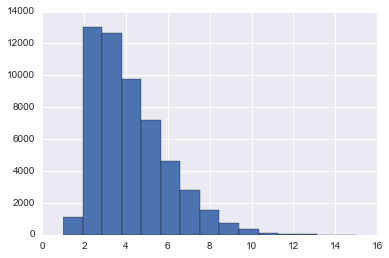

In [17]:
plt.figure()
plt.hist(categ_mat.sum(axis=1), bins=15)
plt.show()

In [18]:
mutations_categ_df = pd.DataFrame(categ_mat, columns=cols)

In [28]:
mutations_categ_df.head()

,SA108D,SA108G,SA108P,SA108S,SA108T,SA108V,SA152D,SA152G,SA152P,SA152S,...,SY72R,SY72S,SY90*,SY90C,SY90D,SY90F,SY90H,SY90N,SY90R,SY90S
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
mutation_categ_int_df = mutations_categ_df.astype(int)

In [30]:
mutation_categ_int_df.head()

,SA108D,SA108G,SA108P,SA108S,SA108T,SA108V,SA152D,SA152G,SA152P,SA152S,...,SY72R,SY72S,SY90*,SY90C,SY90D,SY90F,SY90H,SY90N,SY90R,SY90S
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df = df.ix[1:]
df = df.reset_index()
df = df.drop(['index'], axis=1)

In [25]:
df.head()

,aaMutations,uniqueBarcodes,medianBrightness,std
0,SA108D,1,1.301030,NaN
1,SA108D:SN144D:SI186V:SM231T:SL234P,1,1.301031,NaN
2,SA108D:SY141N:SH146L:SE220G,1,1.301189,NaN
3,SA108G,2,3.708478,0.020613
4,SA108G:SK138M:SR166C:SL234P,1,3.582764,NaN


In [33]:
final_df = pd.concat((mutation_categ_int_df,df),axis=1)

final_df = final_df.drop(['aaMutations'], axis = 1)

final_df.head()

,SA108D,SA108G,SA108P,SA108S,SA108T,SA108V,SA152D,SA152G,SA152P,SA152S,...,SY90C,SY90D,SY90F,SY90H,SY90N,SY90R,SY90S,uniqueBarcodes,medianBrightness,std
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.301030,NaN
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.301031,NaN
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.301189,NaN
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,3.708478,0.020613
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3.582764,NaN


In [41]:
final_df.to_csv('mutation_based_df.csv')